# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import time

training_file = "traffic-signs-data/train.p"
validation_file = "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
class_names = pd.read_csv('signnames.csv', usecols=['SignName']).values
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

In [2]:
print(len(X_train), len(train))
print(type(y_train))
# print(y_test.shape)
# tt = np.concatenate((y_train, y_valid, y_test))

print(type(class_names))
print(class_names[1][0])

print(train['coords'][100])

34799 4
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Speed limit (30km/h)
[ 5  5 25 28]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)
# TODO: Number of validation examples
n_validation = len(X_valid)
# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[6].shape

# TODO: How many unique classes/labels there are in the dataset.
# n_classes = len(set(np.concatenate((y_train, y_valid, y_test))))
n_classes = len(np.unique(y_train)) # may not be correct since y_train might not contain all the classes  

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

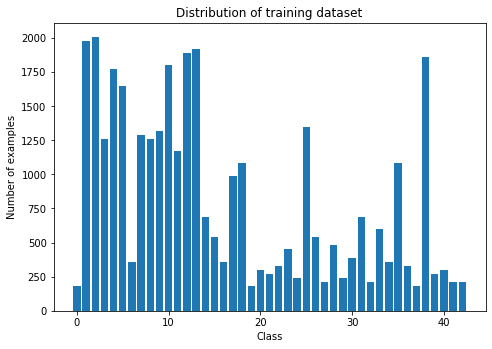

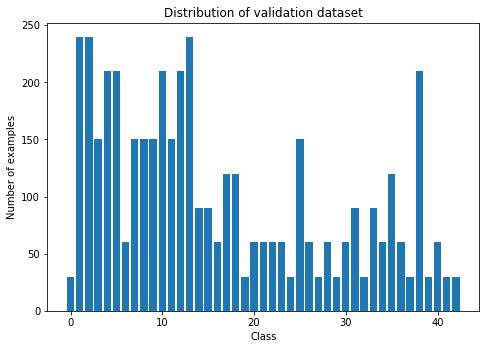

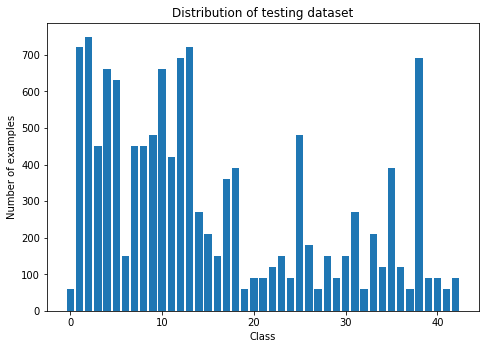

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


In [4]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.utils import shuffle

# Visualizations will be shown in the notebook.
%matplotlib inline

def show_class(labels, n_names, dataset_type=None):
#     figsize=(10,10)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    sign_names = list(range(n_names))
    counts = [0]*n_names
    for i in labels:
        counts[i]+=1
    ax.bar(sign_names,counts)
    ax.set_title("Distribution of "+dataset_type+" dataset")
    ax.set_xlabel("Class")
    ax.set_ylabel("Number of examples")
    if(dataset_type!=None):
        string = './image/' + dataset_type + '_bar.png'
        fig.savefig(string,dpi=400, bbox_inches='tight', pad_inches=0)
    plt.show()
    return counts

count_train = show_class(y_train, n_classes, 'training')
count_valid = show_class(y_valid, n_classes, 'validation')
count_test = show_class(y_test, n_classes, 'testing')
print(count_train)

In [5]:
# for training set 
# most_label = []
# upper_limit = 1200
# print('@ Classes in training set that have number of samples more than '+str(upper_limit)+':')
# for i in range(n_classes):
#     if(count_train[i] > upper_limit):
#         print(class_names[i][0])
#         most_label.append(class_names[i][0])

# print(most_label)

# for training set 
# lower_limit = 500
# print('@ Classes in training set that have number of samples less than '+str(lower_limit)+':')
# for i in range(n_classes):
#     if(count_train[i] <= lower_limit):
#         print(class_names[i][0])

In [6]:
def show_img(img, label=-1, space=None):
    plt.figure()
    if space=='cv2':
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        if(len(img.shape)==2):
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(img)
        
    if label != -1:
        print(class_names[label][0])
    return 

Speed limit (50km/h)


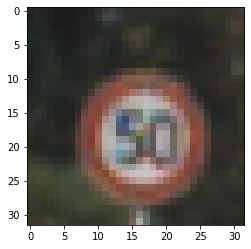

In [7]:
img_index = random.randint(0, len(X_train))
show_img(X_train[img_index], y_train[img_index])

(32, 32, 3)
(1, 32, 32, 3)


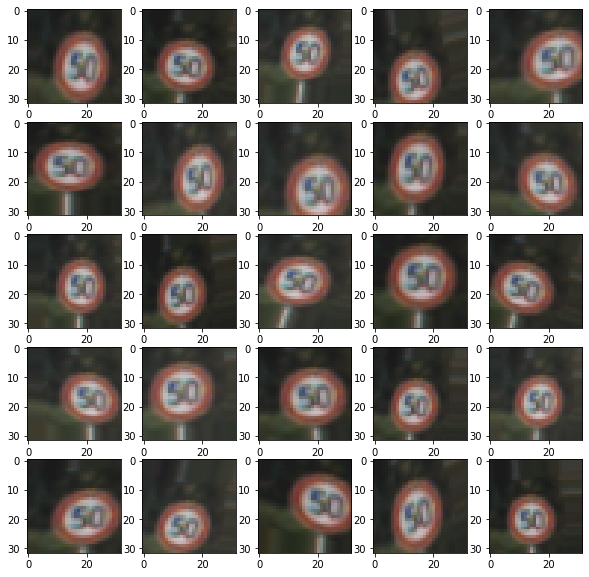

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import BatchNormalization

sample = X_train[img_index]
data_gen = ImageDataGenerator(rotation_range=15, width_shift_range=0.15, height_shift_range=0.15,shear_range=10,
                              zoom_range=0.2,channel_shift_range=10)
print(sample.shape)
sample = np.expand_dims(sample, 0)
print(sample.shape)

iterator = data_gen.flow(sample, batch_size=1)

c = 5
fig, axs = plt.subplots(c,c, figsize=(10,10))
for i in range(c):
    for j in range(c):
#         plt.subplot(3,3, (i, j))
        batch = iterator.next()
        image = batch[0].astype('uint8')
        axs[i,j].imshow(image)
    
plt.show()

In [9]:
# actual augmentation of training data
# data_aug = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,
#                               rotation_range=30, width_shift_range=0.2, height_shift_range=0.2,shear_range=15,
#                               zoom_range=0.2,channel_shift_range=100,horizontal_flip = True)

data_aug = ImageDataGenerator(rotation_range=13, width_shift_range=0.14, height_shift_range=0.14,shear_range=9,
                              zoom_range=0.2,channel_shift_range=15)
img_num_theshold = 1500
for i in range(n_classes):
    print(i, ':')
    if count_train[i] < img_num_theshold:
        image_aug = []
        print('processing')
        indices = np.where(y_train==i)[0]
#         print(indices)
#         random_idx = random.choice(indices)
#         print(random_idx)
        
        for j in range(img_num_theshold-count_train[i]):
            idx_ = j % len(indices)
            target = X_train[indices[idx_]] # the image that need to be augmented
            t1 = np.expand_dims(target, 0)
#             print(i)
            iterator = data_aug.flow(t1, batch_size=1)
            batch = iterator.next()
            image = batch[0].astype('uint8')
            image_aug.append(image)
            y_train = np.concatenate((y_train, [i]), axis=0)
            
        X_train = np.concatenate((X_train, image_aug), axis=0)
        
print('Augmentation finished.')


0 :
processing
1 :
2 :
3 :
processing
4 :
5 :
6 :
processing
7 :
processing
8 :
processing
9 :
processing
10 :
11 :
processing
12 :
13 :
14 :
processing
15 :
processing
16 :
processing
17 :
processing
18 :
processing
19 :
processing
20 :
processing
21 :
processing
22 :
processing
23 :
processing
24 :
processing
25 :
processing
26 :
processing
27 :
processing
28 :
processing
29 :
processing
30 :
processing
31 :
processing
32 :
processing
33 :
processing
34 :
processing
35 :
processing
36 :
processing
37 :
processing
38 :
39 :
processing
40 :
processing
41 :
processing
42 :
processing
Augmentation finished.


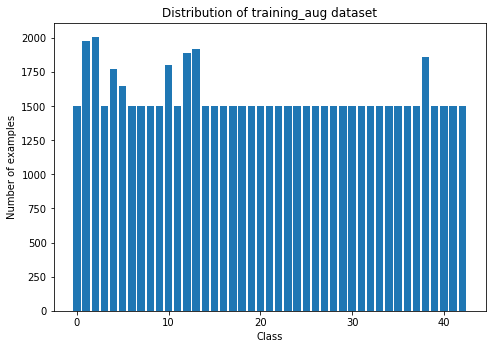

Double curve


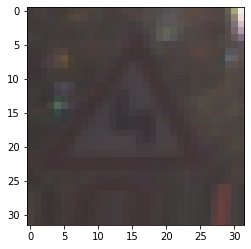

In [10]:
count_train_2 = show_class(y_train, n_classes, 'training_aug')
img_inddd = random.randint(0, len(X_train))
show_img(X_train[img_inddd], y_train[img_inddd])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [11]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

def normalize_pixel(dataset, gray=True): 
#     norm = np.ndarray(shape=dataset.shape, dtype=float)
    if gray==True:
        new_shape = (dataset.shape[0], dataset.shape[1], dataset.shape[2], 1)
        norm = np.ndarray(shape=new_shape, dtype=float)
    else:
        norm = np.ndarray(shape=dataset.shape, dtype=float)
    i = 0
    for img_array in dataset:
        if gray:
            temp = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
            temp = (temp-128.0)/128.0
#             temp = temp/255
#             assert (temp[..., None]==temp.reshape(32,32,1)).all(), "They are not the same"
            norm[i] = temp.reshape(32,32,1)
        else:
            norm[i] = (img_array-128.0)/128.0  
            
        i+=1
    return norm

X_train_norm = normalize_pixel(X_train)
X_valid_norm = normalize_pixel(X_valid)
X_test_norm = normalize_pixel(X_test)
# X_train_norm = normalize_pixel(X_train, False)
# X_valid_norm = normalize_pixel(X_valid, False)
# X_test_norm = normalize_pixel(X_test, False)

# shuffle the training data, since the order of data may affect the result of the model.
X_train_norm, y_train_ = shuffle(X_train_norm, y_train)
# data_aug.fit(X_train)

In [12]:
j = random.randint(0, len(X_train_norm))
imgg = X_train_norm[j]
print(X_train_norm.shape)
print(imgg.shape)

# print(data_aug)

(67380, 32, 32, 1)
(32, 32, 1)


### Model Architecture

In [13]:
#### Define your architecture here.

# Number of samples to calculate validation and accuracy
# Decrease this if you're running out of memory to calculate accuracy

def conv2d(x, W, b, stride=1, pad='VALID'):
    x = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding=pad)
    # tf.keras.activations.relu()
    return  tf.nn.bias_add(x, b) # Add bias

def maxpooling(x, k=2, s=2, pad='VALID'):
    # down sampling, reduce its dimensionality
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, s, s, 1], padding=pad)

def drop_out(x, keep_prob):
    # Dropout: the probability to keep units, prevent overfitting
    return tf.nn.dropout(x, keep_prob)

def fully_connected(x, W, b):
    return tf.add(tf.matmul(x, W), b)
#     fc = tf.nn.batch_normalization(fc, 0, 1)   , gamma, beta,

def cnn(x, regu = None):   
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0 # zero mean 
    sigma = 0.1 # standard deviation -------------
    kernel_size = 5
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([kernel_size, kernel_size, 1, 6], mu, sigma)),
        'wc2': tf.Variable(tf.truncated_normal([kernel_size, kernel_size, 6, 16], mu, sigma)),
        'wc3': tf.Variable(tf.truncated_normal([kernel_size, kernel_size, 16, 30], mu, sigma)),
        'wfc1': tf.Variable(tf.truncated_normal([4*4*30, 250], mu, sigma)), 
        'wfc2': tf.Variable(tf.truncated_normal([250, 90], mu, sigma)),
#         'wfc3': tf.Variable(tf.truncated_normal([110, 80], mu, sigma)), # kernel_size*kernel_size*412
        'out': tf.Variable(tf.truncated_normal([90, n_classes], mu, sigma))}

    biases = {
        'bc1': tf.Variable(tf.zeros(6)),
        'bc2': tf.Variable(tf.zeros(16)),
        'bc3': tf.Variable(tf.zeros(30)),
        'bfc1': tf.Variable(tf.zeros(250)),
        'bfc2': tf.Variable(tf.zeros(90)),
#         'bfc3': tf.Variable(tf.zeros(80)),
        'out': tf.Variable(tf.zeros(n_classes))}
    
    L2norm = tf.nn.l2_loss(weights['wfc1'])+tf.nn.l2_loss(weights['wfc2'])+tf.nn.l2_loss(weights['out'])
    
    # Convolutional layers
    # c1: Input = 32x32x1.  Output = 28x28x6.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = tf.nn.relu(conv1, name='convolutional_1') # Activation function ReLU
    # Pooling. Input = 28x28x6. Output = 14x14x6.
#     conv1 = maxpooling(conv1)
    # c2: Input = 14x14x6. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'], stride=2)
    conv2 = tf.nn.relu(conv2, name='convolutional_2') # Activation function ReLU
    # Pooling. Input = 10x10x16. Output = 5x5x16.
#     conv2 = maxpooling(conv2)
    
#     c2: Input = 14x14x6. Output = 10x10x16.
    conv3= conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = tf.nn.relu(conv3, name='convolutional_3') # Activation function ReLU
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv3 = maxpooling(conv3)
    
    # Flatten = vectorization
    flat = tf.contrib.layers.flatten(conv3)
    
#     vec1 = flat
    vec1 = tf.nn.dropout(flat, keep_prob1, name = 'dropout_1')
    # Fully connected layers
    
    if regu=='dropout':
        # fc1: Input = 400. Output = 120.
        fc1 = fully_connected(vec1, weights['wfc1'], biases['bfc1'])
        fc1 = tf.nn.relu(fc1, name='fully_connected_1')
#         fc1 = tf.nn.dropout(fc1, keep_prob2, name='dropout_2')
        # fc2: Input = 120. Output = 84.
        fc2 = fully_connected(fc1, weights['wfc2'], biases['bfc2'])
        fc2 = tf.nn.relu(fc2, name='fully_connected_2')
        fc2 = tf.nn.dropout(fc2, keep_prob2, name='dropout_3')
#         fc3 = fully_connected(fc2, weights['wfc3'], biases['bfc3'], True, keep_prob2)

    else:
        # fc1: Input = 400. Output = 120.
        fc1 = fully_connected(vec1, weights['wfc1'], biases['bfc1'])
        fc1 = tf.nn.relu(fc1, name='fully_connected_1')
        # fc2: Input = 120. Output = 84.
        fc2 = fully_connected(fc1, weights['wfc2'], biases['bfc2'])
        fc2 = tf.nn.relu(fc2, name='fully_connected_2')
    
    # fc3:
    logits = fully_connected(fc2, weights['out'], biases['out'])
    return logits, L2norm


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)

# Parameters
EPOCHS = 25
BATCH_SIZE = 128
rate = 0.00087 # learning rate
beta = 0.0001 # L2 norm regulerization  + beta*l2_norm

logits, l2_norm = cnn(x, 'dropout')
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [15]:
#             train_loss_sum += loss * len(batch_x)
#             train_accu_sum += accuracy * len(batch_x)
# trying batch norm and augmentation
#     for i in range(EPOCHS):
# #         X_train_nom, y_train_ = shuffle(X_train_norm, y_train_)
# #         X_train, y_train = shuffle(X_train, y_train)
#         t_start = time.time()
#         escape=0
#         for batch_x, batch_y in data_aug.flow(X_train, y_train, batch_size=BATCH_SIZE):
#             batch_x = normalize_pixel(batch_x)
#             sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
#             escape += 1
#             if escape >= num_examples/BATCH_SIZE:
#                 break 

In [16]:
# accuracy evalutation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob1: 1.0, keep_prob2:1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

In [17]:
# Start to train!!!
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # variable initialization
    num_examples = len(X_train_norm)
    valid_losses, valid_accuracy_ = [], []
    train_losses, train_accuracy_ = [], []
    
    print("Training...")
    print()
    
    for i in range(EPOCHS):
        train_loss_sum = 0
        train_accu_sum = 0
        X_train_norm, y_train_ = shuffle(X_train_norm, y_train_)
        t_start = time.time()
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train_[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 0.6, keep_prob2:0.7})       
        t_end = time.time()
#         train_losses.append(train_loss_sum/num_examples)
#         train_accuracy_.append(train_accu_sum/num_examples*100)
        validation_accuracy, valid_loss = evaluate(X_valid_norm, y_valid)
        valid_losses.append(valid_loss)
        valid_accuracy_.append(validation_accuracy*100)
        print("EPOCH {0} ... [used {1:.2f} s]".format(i+1, time.time()-t_start))
        print("Validation Accuracy = {:.2f} %".format(validation_accuracy*100))
        print()
        
        
    saver.save(sess, './lenet')
    print("Model saved")
    print()

Training...

EPOCH 1 ... [used 34.17 s]
Validation Accuracy = 85.35 %

EPOCH 2 ... [used 36.72 s]
Validation Accuracy = 91.61 %

EPOCH 3 ... [used 50.69 s]
Validation Accuracy = 94.24 %

EPOCH 4 ... [used 38.57 s]
Validation Accuracy = 95.15 %

EPOCH 5 ... [used 36.57 s]
Validation Accuracy = 96.73 %

EPOCH 6 ... [used 40.20 s]
Validation Accuracy = 97.76 %

EPOCH 7 ... [used 32.45 s]
Validation Accuracy = 97.39 %

EPOCH 8 ... [used 28.35 s]
Validation Accuracy = 97.41 %

EPOCH 9 ... [used 27.07 s]
Validation Accuracy = 98.03 %

EPOCH 10 ... [used 28.09 s]
Validation Accuracy = 97.87 %

EPOCH 11 ... [used 28.95 s]
Validation Accuracy = 97.91 %

EPOCH 12 ... [used 26.60 s]
Validation Accuracy = 97.80 %

EPOCH 13 ... [used 28.60 s]
Validation Accuracy = 98.48 %

EPOCH 14 ... [used 27.39 s]
Validation Accuracy = 98.25 %

EPOCH 15 ... [used 28.00 s]
Validation Accuracy = 98.44 %

EPOCH 16 ... [used 29.15 s]
Validation Accuracy = 97.87 %

EPOCH 17 ... [used 25.71 s]
Validation Accuracy = 98

Diagnoise


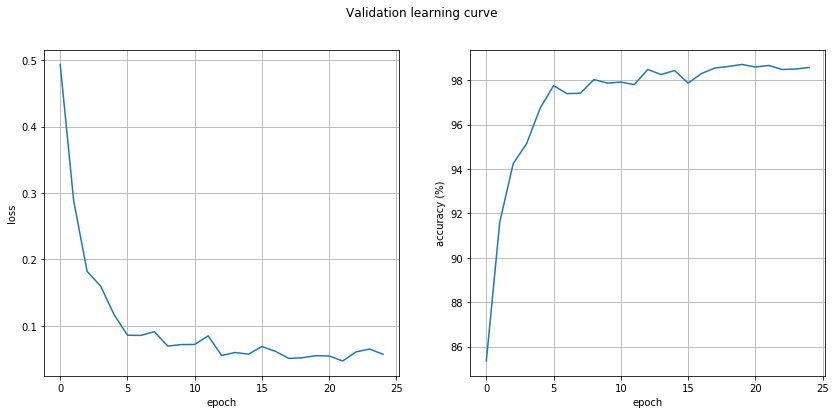

In [18]:
# plot the loss and the accuracy    
#     fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
#     fig1.suptitle('Training learning curve')
#     ax1.plot(train_losses)
#     ax2.plot(train_accuracy_)
print('Diagnoise')
plt.rcParams['axes.grid'] = True

fig2, (ax3, ax4) = plt.subplots(1,2, figsize=(14,6))
fig2.suptitle('Validation learning curve')
ax3.plot(valid_losses)
ax3.set_xlabel('epoch')
ax3.set_ylabel('loss')
ax4.plot(valid_accuracy_)
ax4.set_xlabel('epoch')
ax4.set_ylabel('accuracy (%)')
save_namee = './image/learning_curve.png'
fig2.savefig(save_namee,dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()


In [19]:
# check accuracy of train set

with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_accuracy, train_los = evaluate(X_train_norm, y_train_)
    validd_accuracy, validd_los = evaluate(X_valid_norm, y_valid)
    
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Validation Accuracy = {:.3f}".format(validd_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 0.997
Validation Accuracy = 0.986


In [20]:
# test set accuracy - only run once
with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy, test_los = evaluate(X_test_norm, y_test)
    
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.959


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

### Load and Output the Images

8
[ 5 38 18  2 18  9 11 17]


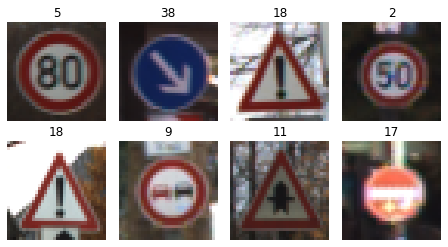

In [21]:
### Load the images and plot them here.
import os
import cv2
import csv 

path = './new_test_image/'
my_test_image = []
my_test_label = []
csv_names = []
csv_labels = []
dic = {}
with open(path+'GT-final_test.csv') as f:
    for i, line in enumerate(f):
        if i == 0: continue
        temp = line.split(";")
        dic[temp[0]] = int(temp[-1])
#         print(int(temp[-1]))

fig, axs = plt.subplots(2,4, figsize=(8, 4))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
    
rand_idx = random.randint(0, 9)
all_file_names = os.listdir(path)
temp = all_file_names[rand_idx:]
for filename in temp:
    image = cv2.imread(os.path.join(path,filename))
    if image is not None and len(my_test_image) < 8:
        name = filename.replace('png', '')+'ppm'
        label_ = dic[name]
        resized = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA)
        my_test_image.append(resized)
        my_test_label.append(label_)


print(len(my_test_image))
# random_index = random.randint(0, len(my_test_image)-1)
#     random_index = (random_index+1) % len(my_test_image)
for n in range(8):
    img = my_test_image[n]
    axs[n].axis('off')
    axs[n].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[n].set_title(my_test_label[n])

    
my_test_image = np.asarray(my_test_image)
my_test_label = np.asarray(my_test_label)

print(my_test_label)

In [22]:
# preprocessing 
for label in my_test_label:
    print(class_names[label][0])

my_test_image_norm = normalize_pixel(my_test_image)
# my_test_image, my_test_label = shuffle(my_test_image, my_test_label)

Speed limit (80km/h)
Keep right
General caution
Speed limit (50km/h)
General caution
No passing
Right-of-way at the next intersection
No entry


### Predict the Sign Type for Each Image

In [23]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
guess = tf.math.argmax(logits, 1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')
    predictions = sess.run(guess, feed_dict={x:my_test_image_norm, y:my_test_label, keep_prob1: 1.0, keep_prob2:1.0})
    new_test_accuracy, new_test_los = evaluate(my_test_image_norm, my_test_label)
    
    print("Test Accuracy of new images = {:.3f}".format(new_test_accuracy))
    
print(predictions)
for l in range(len(predictions)):
    print(class_names[predictions[l]][0], '---', class_names[my_test_label[l]][0])
    

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy of new images = 0.875
[ 5 38 18  2 18  9 11 14]
Speed limit (80km/h) --- Speed limit (80km/h)
Keep right --- Keep right
General caution --- General caution
Speed limit (50km/h) --- Speed limit (50km/h)
General caution --- General caution
No passing --- No passing
Right-of-way at the next intersection --- Right-of-way at the next intersection
Stop --- No entry


INFO:tensorflow:Restoring parameters from ./lenet
Trying result:  Stop
Trying result:  Roundabout mandatory
Trying result:  Roundabout mandatory
Trying result:  Go straight or left


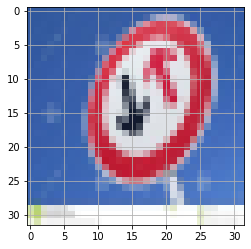

In [24]:
guessing = tf.math.argmax(logits, 1)

i1 = cv2.resize(cv2.cvtColor(cv2.imread('./new_test_image/stop.jpg'), cv2.COLOR_BGR2RGB), (32,32), interpolation = cv2.INTER_AREA)
i2 = cv2.resize(cv2.cvtColor(cv2.imread('./new_test_image/sign30.jpg'), cv2.COLOR_BGR2RGB), (32,32), interpolation = cv2.INTER_AREA)
i3 = cv2.resize(cv2.cvtColor(cv2.imread('./new_test_image/priority.jpg'), cv2.COLOR_BGR2RGB), (32,32), interpolation = cv2.INTER_AREA)
i4 = cv2.resize(cv2.cvtColor(cv2.imread('./new_test_image/left_straight.jpg'), cv2.COLOR_BGR2RGB), (32,32), interpolation = cv2.INTER_AREA)
plt.imshow(i3)
try_set = [i1, i2, i3, i4]
try_set = np.asarray(try_set)
try_set = normalize_pixel(try_set)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')
    ppp = sess.run(guessing, feed_dict={x:try_set, keep_prob1: 1.0, keep_prob2:1.0})
    
    for i in ppp:
        print("Trying result: ", class_names[i][0])

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

softmax_ = tf.nn.softmax(logits)
top_ks = tf.nn.top_k(softmax_, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, './lenet')
    
#     softmax_predict = sess.run(softmax_, feed_dict={x:my_test_image, y:my_test_label, keep_prob1: 1.0, keep_prob2:1.0})
    top_k_ = sess.run(top_ks, feed_dict={x:my_test_image_norm, y: my_test_label, keep_prob1: 1.0, keep_prob2:1.0})
    
    prob = top_k_.values
    indices = top_k_.indices
    print(top_k_)
    
    assert(len(my_test_image)==len(indices))     

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[9.9991453e-01, 8.0036036e-05, 4.7531817e-06, 5.5744607e-07,
        6.0430125e-08],
       [1.0000000e+00, 7.4483900e-18, 5.2424763e-18, 4.6797904e-18,
        4.0328161e-18],
       [1.0000000e+00, 1.0619587e-09, 1.4436798e-11, 4.2979734e-18,
        3.6505901e-20],
       [1.0000000e+00, 1.8068229e-11, 1.9489286e-12, 5.1858712e-17,
        1.4676159e-17],
       [1.0000000e+00, 9.2087657e-11, 3.8677319e-16, 2.0510514e-24,
        2.6269343e-28],
       [1.0000000e+00, 7.1838472e-17, 3.2639826e-17, 1.7015683e-17,
        1.6903436e-17],
       [1.0000000e+00, 3.1511793e-09, 1.1877415e-09, 3.3184566e-10,
        4.4919827e-12],
       [5.7315195e-01, 4.2682004e-01, 2.5032226e-05, 2.2388522e-06,
        3.5315608e-07]], dtype=float32), indices=array([[ 5,  2,  3,  7,  1],
       [38, 23, 34, 21, 40],
       [18, 26, 27, 24, 22],
       [ 2,  1,  5,  3,  7],
       [18, 26, 27, 24, 22],
       [ 9, 19, 16, 15, 10],
 

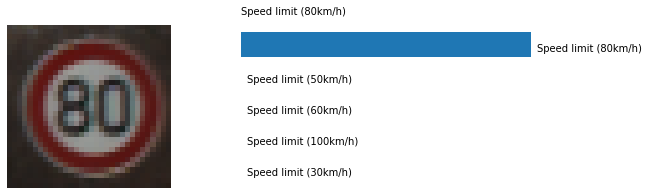

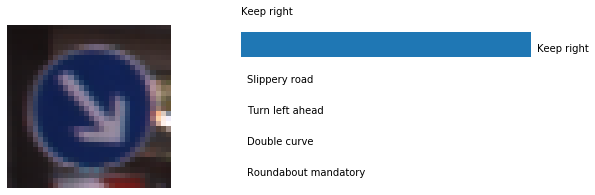

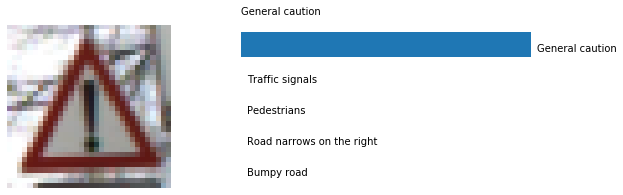

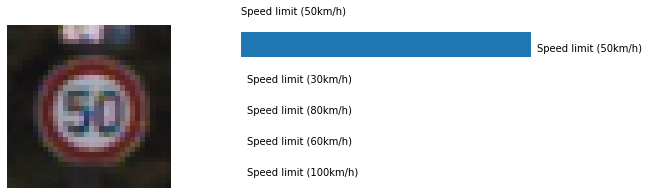

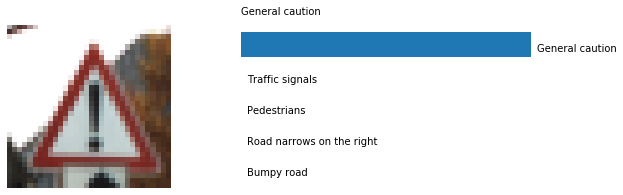

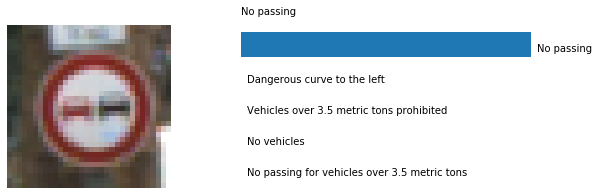

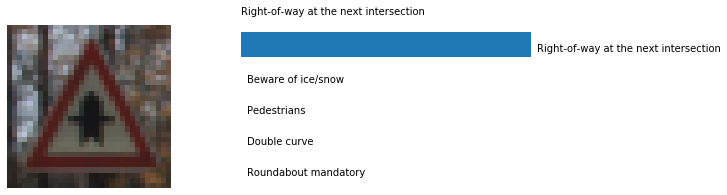

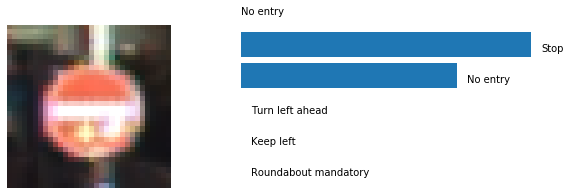

In [26]:
# for x in range(len(my_test_image)):
#     cur = my_test_label[x] # current label
#     labels = indices[x] # top 5 prediction results for each new image
#     print('True label: ', class_names[cur][0])
#     print('Predictions...')
#     for j in range(5):
#         print("Top",str(j+1), ": ", class_names[labels[j]][0], '-->', prob[x][j]*100, '%') 

#     print()


import matplotlib.gridspec as gridspec

for i in range(len(my_test_image)):
    cur = my_test_label[i]
    plt.figure(figsize = (10,3))
    gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])
    plt.subplot(gs[0])
    plt.imshow(cv2.cvtColor(my_test_image[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(gs[1])
    plt.barh(6-np.arange(5),prob[i], align='center')
    for i_label in range(5):
        plt.text(prob[i][i_label]+0.02, 6-i_label-.25, class_names[indices[i][i_label]][0])
    plt.axis('off');
    plt.text(0,6.95,class_names[cur][0]);
    plt.show();
    print()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [27]:
### Visualize your network's feature maps here.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x:image_input, keep_prob1: 1.0, keep_prob2:1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(20,20))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./lenet


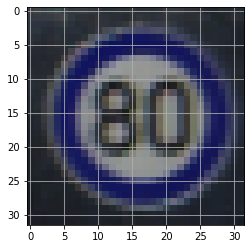

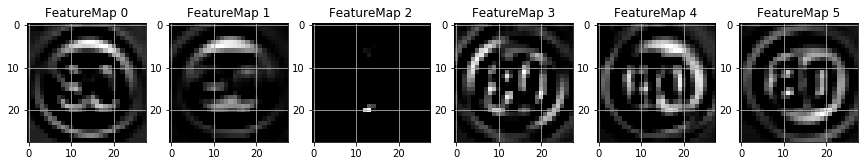

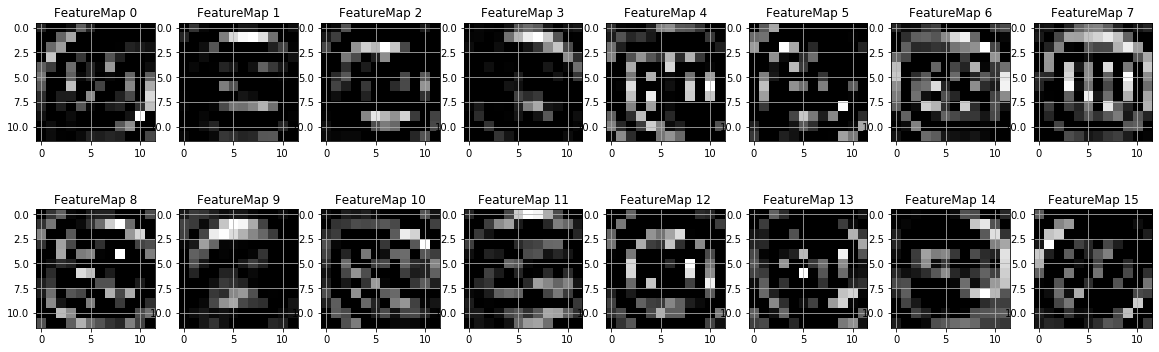

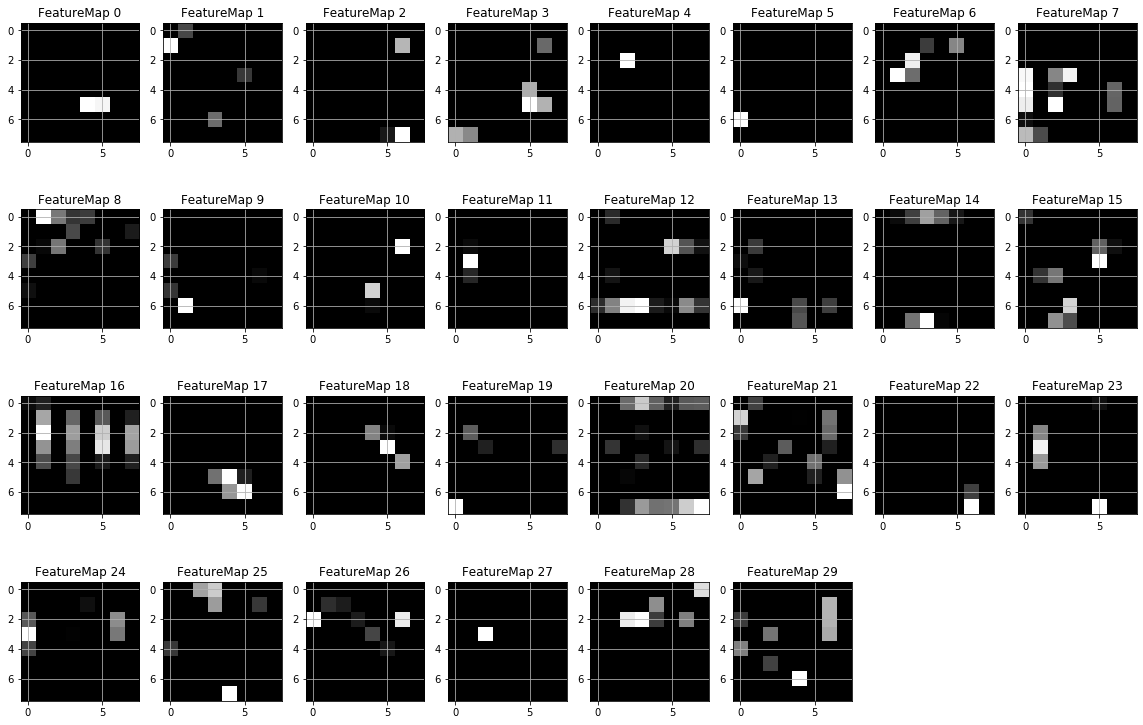

In [28]:
# visual_target = X_train_norm[xx]
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    xx = random.randint(0, len(my_test_image))
#     temp = X_train_norm[xx]
#     plt.imshow(cv2.cvtColor(X_train_norm[xx], cv2.COLOR_GRAY2RGB))
    plt.imshow(my_test_image[xx])
    plt.show()
    visual_target = np.expand_dims(my_test_image_norm[xx], axis=0)
    conv1_ = tf.get_default_graph().get_tensor_by_name('convolutional_1:0')
#     conv_ = sess.graph.get_tensor_by_name('convolutional_1:0')
    outputFeatureMap(visual_target, conv1_, plt_num=1)
    
    conv2_ = tf.get_default_graph().get_tensor_by_name('convolutional_2:0')
    outputFeatureMap(visual_target, conv2_, plt_num=2)
    
    conv3_ = tf.get_default_graph().get_tensor_by_name('convolutional_3:0')
    outputFeatureMap(visual_target, conv3_, plt_num=3)
    
#     fc_ = tf.get_default_graph().get_tensor_by_name('fully_connected_2:0')
# #     fc_ = sess.graph.get_tensor_by_name('fully_connected_2:0')
#     outputFeatureMap(visual_target, fc_, plt_num=2)
    